# "Культурист-датасаентист"
# ML анализ оттока клиентов
В этом проекте стоит задача помочь фитнес-центру разработать стратегию взаимодействия с клиентами на основе анализа данных клиентских анкет. Воспользуемся машинным обучением для кластеризации клиентов (выделим несколько наиболее ярких групп и охарактеризуем их основные свойства), анализа (посмотрим на основные признаки, наиболее сильно влияющие на отток) и прогноза их оттока на следующий месяц, а в завершении попробуем сделать выводы и дать рекомендации по повышению качества работы с клиентами. В путь!  

Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. Набор данных включает следующие поля:  
'Churn' — факт оттока в текущем месяце;  
Текущие поля в датасете:  
Данные клиента за предыдущий до проверки факта оттока месяц:
'gender' — пол;  
'Near_Location' — проживание или работа в районе, где находится фитнес-центр;  
'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);  
Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);  
'Phone' — наличие контактного телефона;  
'Age' — возраст;  
'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).   
  
Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:  
'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);  
'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);  
'Group_visits' — факт посещения групповых занятий;  
'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;  
'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;  
'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

<h1>ОГЛАВЛЕНИЕ<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Извлечение-данных-и-первичный-анализ" data-toc-modified-id="Извлечение-данных-и-первичный-анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Извлечение данных и первичный анализ</a></span></li><li><span><a href="#Исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Исследовательский-анализ-данных-(EDA)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных (EDA)</a></span><ul class="toc-item"><li><span><a href="#Посмотрим-на-средние-значения-и-стандартные-отклонения-признаков" data-toc-modified-id="Посмотрим-на-средние-значения-и-стандартные-отклонения-признаков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Посмотрим на средние значения и стандартные отклонения признаков</a></span></li><li><span><a href="#Сделаем-то-же-самое-и-ещё-построим-гистограммы-и-распределения-признаков-в-разрезе-тех,-кто-ушел-в-отток-и-тех,-кто-остался" data-toc-modified-id="Сделаем-то-же-самое-и-ещё-построим-гистограммы-и-распределения-признаков-в-разрезе-тех,-кто-ушел-в-отток-и-тех,-кто-остался-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Сделаем то же самое и ещё построим гистограммы и распределения признаков в разрезе тех, кто ушел в отток и тех, кто остался</a></span></li><li><span><a href="#Посмотрим-матрицу-корреляций" data-toc-modified-id="Посмотрим-матрицу-корреляций-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Посмотрим матрицу корреляций</a></span></li></ul></li><li><span><a href="#Модель-прогнозирования-оттока-клиентов" data-toc-modified-id="Модель-прогнозирования-оттока-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Модель прогнозирования оттока клиентов</a></span><ul class="toc-item"><li><span><a href="#Разделим-наши-данные-на-признаки-(матрица-X)-и-целевую-переменную-(y)" data-toc-modified-id="Разделим-наши-данные-на-признаки-(матрица-X)-и-целевую-переменную-(y)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Разделим наши данные на признаки (матрица X) и целевую переменную (y)</a></span></li><li><span><a href="#Обучим-модель-на-train-выборке-двумя-способами:--логистической-регрессией,--случайным-лесом." data-toc-modified-id="Обучим-модель-на-train-выборке-двумя-способами:--логистической-регрессией,--случайным-лесом.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Обучим модель на train-выборке двумя способами:  логистической регрессией,  случайным лесом.</a></span></li><li><span><a href="#Оценим-метрики-accuracy,-precision-и-recall-для-обеих-моделей-на-валидационной-выборке" data-toc-modified-id="Оценим-метрики-accuracy,-precision-и-recall-для-обеих-моделей-на-валидационной-выборке-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке</a></span></li></ul></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Кластеризация клиентов</a></span><ul class="toc-item"><li><span><a href="#Стандартизируем-данные" data-toc-modified-id="Стандартизируем-данные-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Стандартизируем данные</a></span></li><li><span><a href="#Матрица-расстояний-функцией-linkage()" data-toc-modified-id="Матрица-расстояний-функцией-linkage()-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Матрица расстояний функцией linkage()</a></span></li></ul></li><li><span><a href="#Выводы-и-рекомендации-по-работе-с-клиентами" data-toc-modified-id="Выводы-и-рекомендации-по-работе-с-клиентами-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы и рекомендации по работе с клиентами</a></span></li></ul></div>

## Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

## Извлечение данных и первичный анализ

In [2]:
df = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [4]:
df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


In [5]:
df.duplicated().sum()

0

У нас 4000 данных по клиентам, 13 признаков и 1 столбец с информацией о факте оттока (1 - клиент ушел, 0 - не ушел).  
Пропусков нет, дубликатов нет, все данные в подходящем фомате, аномалий не видно. 

## Исследовательский анализ данных (EDA)

### Посмотрим на средние значения и стандартные отклонения признаков

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


In [9]:
df['Contract_period'].unique()

array([ 6, 12,  1])

In [10]:
df.groupby('Contract_period')['gender'].count()

Contract_period
1     2207
6      833
12     960
Name: gender, dtype: int64

У нас практически ровное разбиение по полу клиентов;  
Меньше 85% проживают или работают в районе, где находится фитнес-центр, что кажется не большим показателем, видимо в соседних районах слабая конкуренция;  
Контракты выдают на 1, 6 или 12 месяцев (в задании сказано, что и на 3, но в данных такого не видно);  
Средний возраст всех клиетов - 29 лет;  
Самые первые взаимодействия с клиентом начались 31 месяц назад, в среднем с момента первого обращения в фитнес-центр по всем клиентам составляет 3,7 месяца;  
Средняя частота посещений в неделю за все время с начала действия абонемента по всем клиентам составляет 1,88, медиана - 1,83;  
Тот же показатель, но только за предыдущий месяц имеет схожие показатели - 1,77 в среднем и медиану 1,72;
В среднем по всем клиентам выручка от других услуг фитнес-центра составляет 147 у.е., медиана по этому показателяю равна 136 у.е., максимальная трата - 552 у.е.;  

### Сделаем то же самое и ещё построим гистограммы и распределения признаков в разрезе тех, кто ушел в отток и тех, кто остался

In [11]:
df['Churn'].unique()

array([0, 1])

In [12]:
pd.set_option('display.max_columns', None)

In [13]:
df.groupby('Churn').describe()

gender                                              Near_Location  \
        count      mean       std  min  25%  50%  75%  max         count   
Churn                                                                      
0      2939.0  0.510037  0.499984  0.0  0.0  1.0  1.0  1.0        2939.0   
1      1061.0  0.510839  0.500118  0.0  0.0  1.0  1.0  1.0        1061.0   

                                                   Partner            \
           mean       std  min  25%  50%  75%  max   count      mean   
Churn                                                                  
0      0.873086  0.332933  0.0  1.0  1.0  1.0  1.0  2939.0  0.534195   
1      0.768143  0.422217  0.0  1.0  1.0  1.0  1.0  1061.0  0.355325   

                                         Promo_friends                      \
            std  min  25%  50%  75%  max         count      mean       std   
Churn                                                                        
0      0.498914  0.0  0.0  1.0  1.0  1.0        2939.0  0.353522  0.478144   
1      0.478837  0.0  0.0  0.0  1.0  1.0        1061.0  0.183789  0.387495   

                                 Phone                                     \
       min  25%  50%  75%  max   count      mean       std  min  25%  50%   
Churn                                                                       
0      0.0  0.0  0.0  1.0  1.0  2939.0  0.903709  0.295040  0.0  1.0  1.0   
1      0.0  0.0  0.0  0.0  1.0  1061.0  0.902922  0.296204  0.0  1.0  1.0   

                Contract_period                                           \
       75%  max           count      mean       std  min  25%  50%   75%   
Churn                                                                      
0      1.0  1.0          2939.0  5.747193  4.716942  1.0  1.0  6.0  12.0   
1      1.0  1.0          1061.0  1.728558  2.132371  1.0  1.0  1.0   1.0   

            Group_visits                                                  Age  \
        max        count      mean       std  min  25%  50%  75%  max   count   
Churn                                                                           
0      12.0       2939.0  0.464103  0.498795  0.0  0.0  0.0  1.0  1.0  2939.0   
1      12.0       1061.0  0.268615  0.443448  0.0  0.0  0.0  1.0  1.0  1061.0   

                                                          \
            mean       std   min   25%   50%   75%   max   
Churn                                                      
0      29.976523  3.009933  19.0  28.0  30.0  32.0  41.0   
1      26.989632  2.895163  18.0  25.0  27.0  29.0  38.0   

      Avg_additional_charges_total                                   \
                             count        mean        std       min   
Churn                                                                 
0                           2939.0  158.445715  99.801599  0.171862   
1                           1061.0  115.082899  77.696419  0.148205   

                                                    Month_to_end_contract  \
             25%         50%         75%        max                 count   
Churn                                                                       
0      76.920993  149.881171  224.448274  552.59074                2939.0   
1      50.629127  103.814686  165.616858  425.53522                1061.0   

                                                     Lifetime            \
           mean       std  min  25%  50%   75%   max    count      mean   
Churn                                                                     
0      5.283089  4.363522  1.0  1.0  6.0  10.0  12.0   2939.0  4.711807   
1      1.662582  1.964593  1.0  1.0  1.0   1.0  12.0   1061.0  0.990575   

                                          Avg_class_frequency_total            \
            std  min  25%  50%  75%   max                     count      mean   
Churn                                                                           
0      3.874780  0.0  2.0  4.0  6.0  31

Первое, что мы видим - что отток в отчетном месяце составляет около четверти клиентов (довольно много?).  
Из отличий в глаза бросается, что среди ушедших процент близко живущих или работающих, как и сотрудников компании-партнёра клуба, как и клиентов, которых привели друзья - меньше, что логично. Эти факторы явно помогают определить клиентов, которые скорее останутся. Понятно, что кто берет более продолжительные контракты, скорее будут их продлевать, потому что они изначально меньше сомневаются - отсюда и показатель по средней продолжительности периода контракта и оставшихся гораздо выше (5,7 против 1,7). По посещению групповых занятий я бы не выделял сильного влияния, потому что выше только средний показатель, а медианы практически равны - это значит что среди постоянных клиентов есть любители групповых посещений, но как признак я бы не стал его учитывать. По возрасту можно отметить, что "оттекщие" клиенты помоложе (среднее по оставшимся примерно такое же, как и по всем клиентам - 30 лет, а у ушедщих - средний возраст 27 лет). Доп траты у оставшихся выше, длительность взаимодействия с фитнесом у оставшихся гораздо выше, а посещения по обоим показателям (общее и за прошедший месяц) тоже выше у тех кто не ушел.

Построим матрицы рассеяния

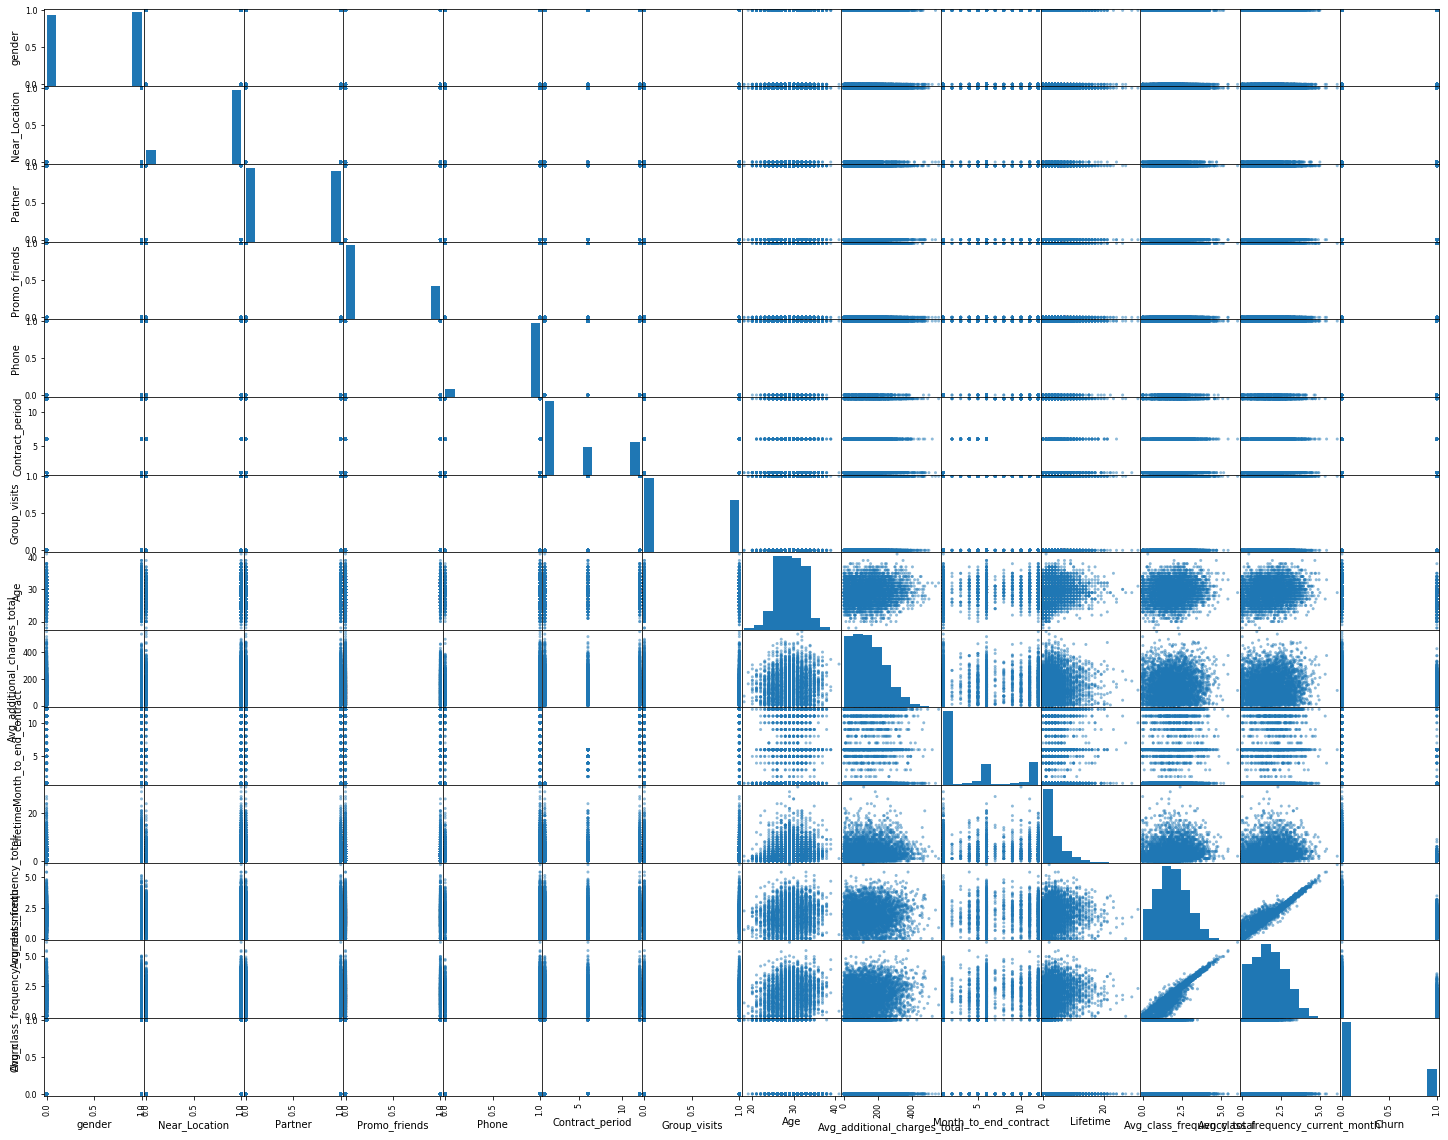

In [14]:
pd.plotting.scatter_matrix(df, figsize=(25, 20));

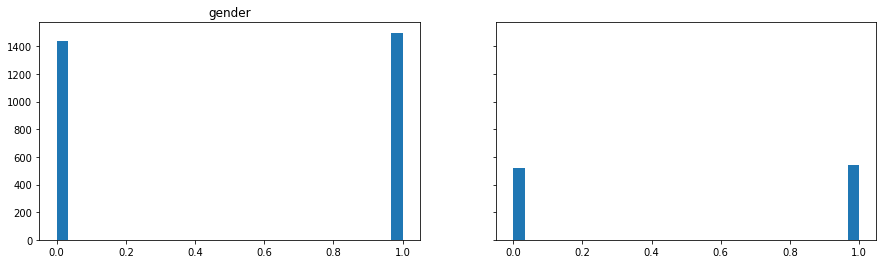

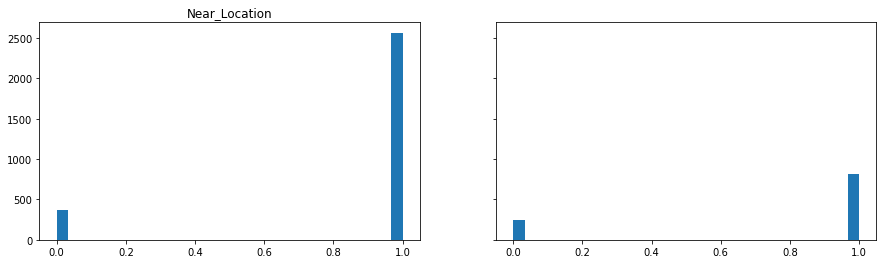

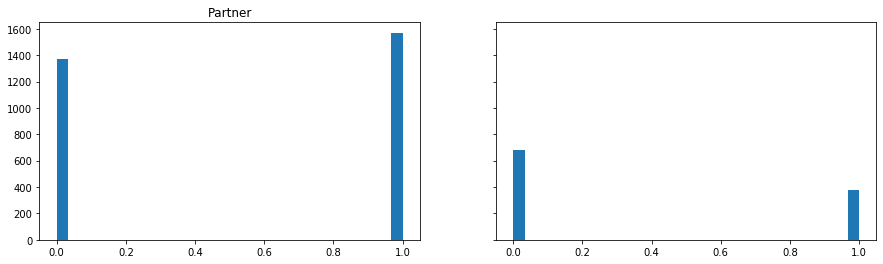

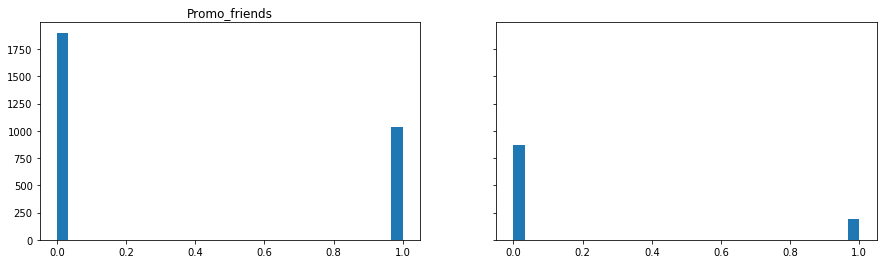

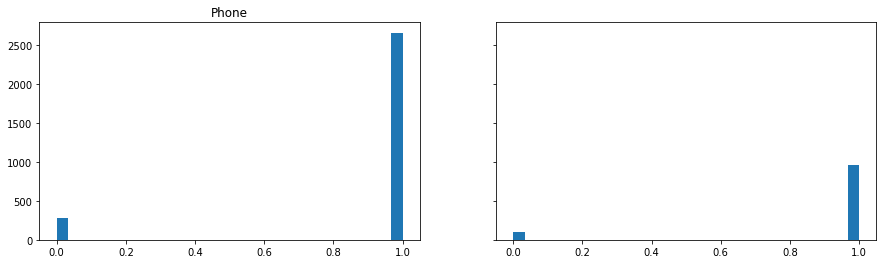

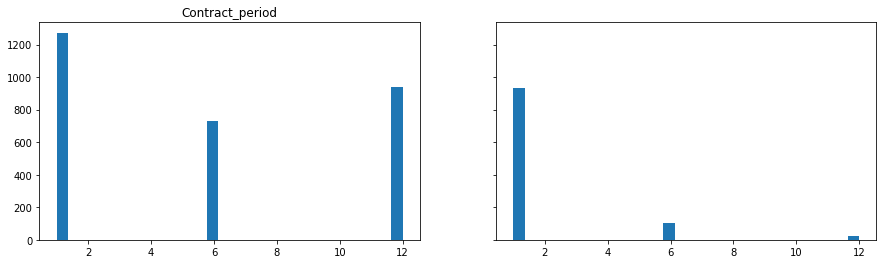

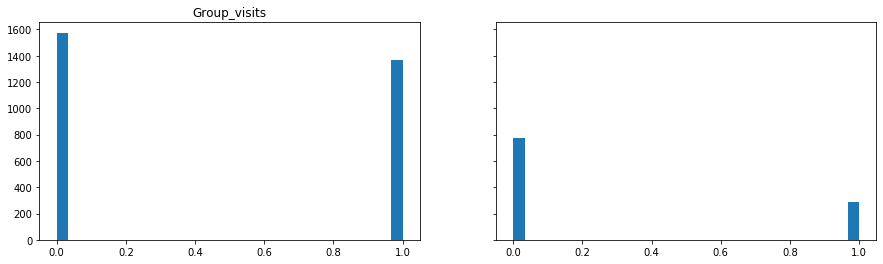

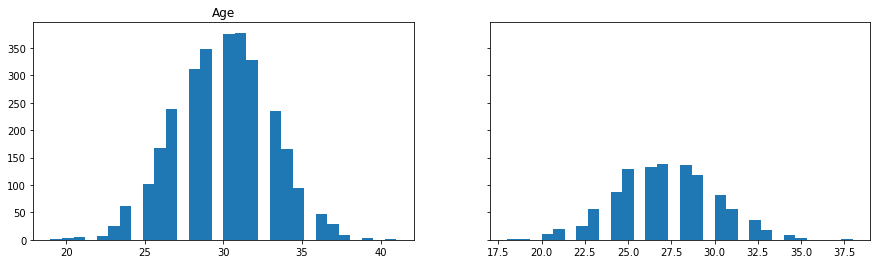

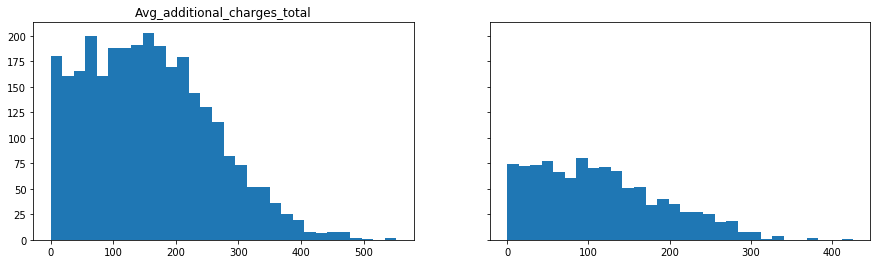

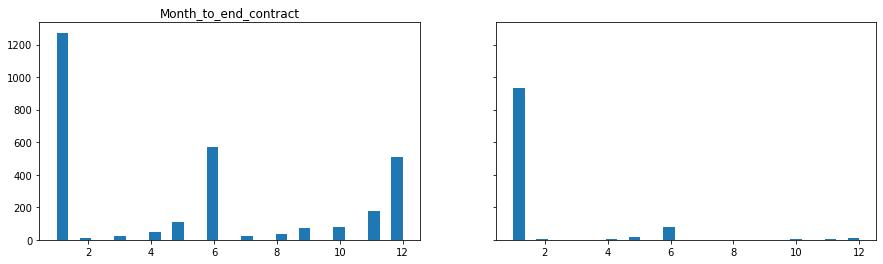

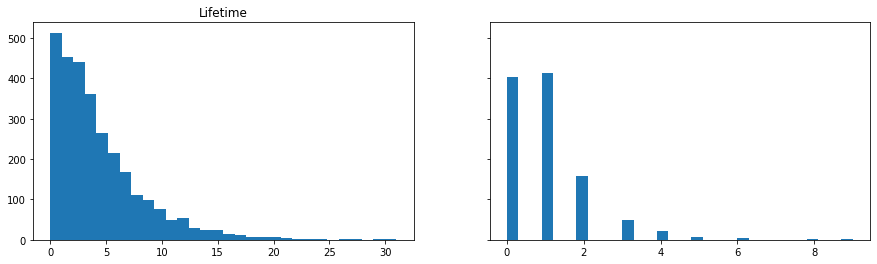

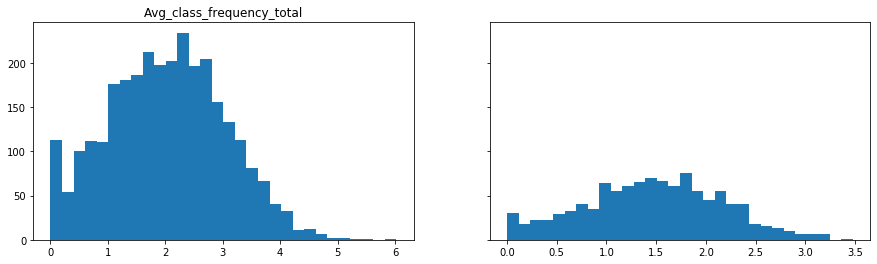

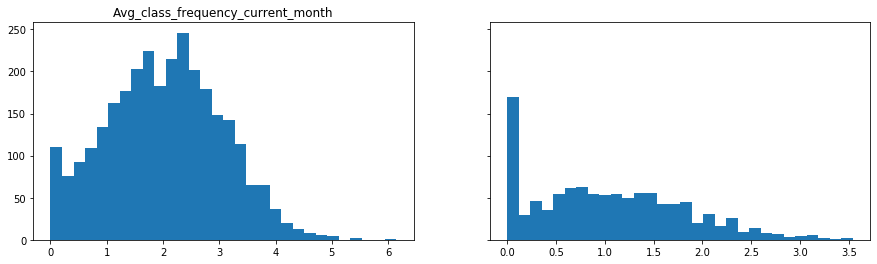

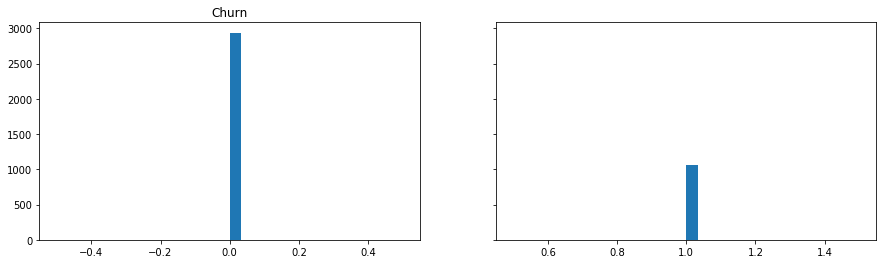

In [18]:
for column in df:
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    f.set_figwidth(15)
    ax1.hist(df[df['Churn'] == 0][column], bins=30)
    ax1.set_title(column)
    ax2.hist(df[df['Churn'] == 1][column], bins=30)
    plt.show()

Возраст ожидаемо распределен нормально на обоих группах. Траты на доп услуги ожидаемо смещены к нулю и убывают по мере нарастания (хи-квадрат?). По остальным вроде ничего примечательного - явных перекосов по диаграммам не наблюдается, на данных можно строить модель

### Посмотрим матрицу корреляций

In [19]:
cm = df.corr()

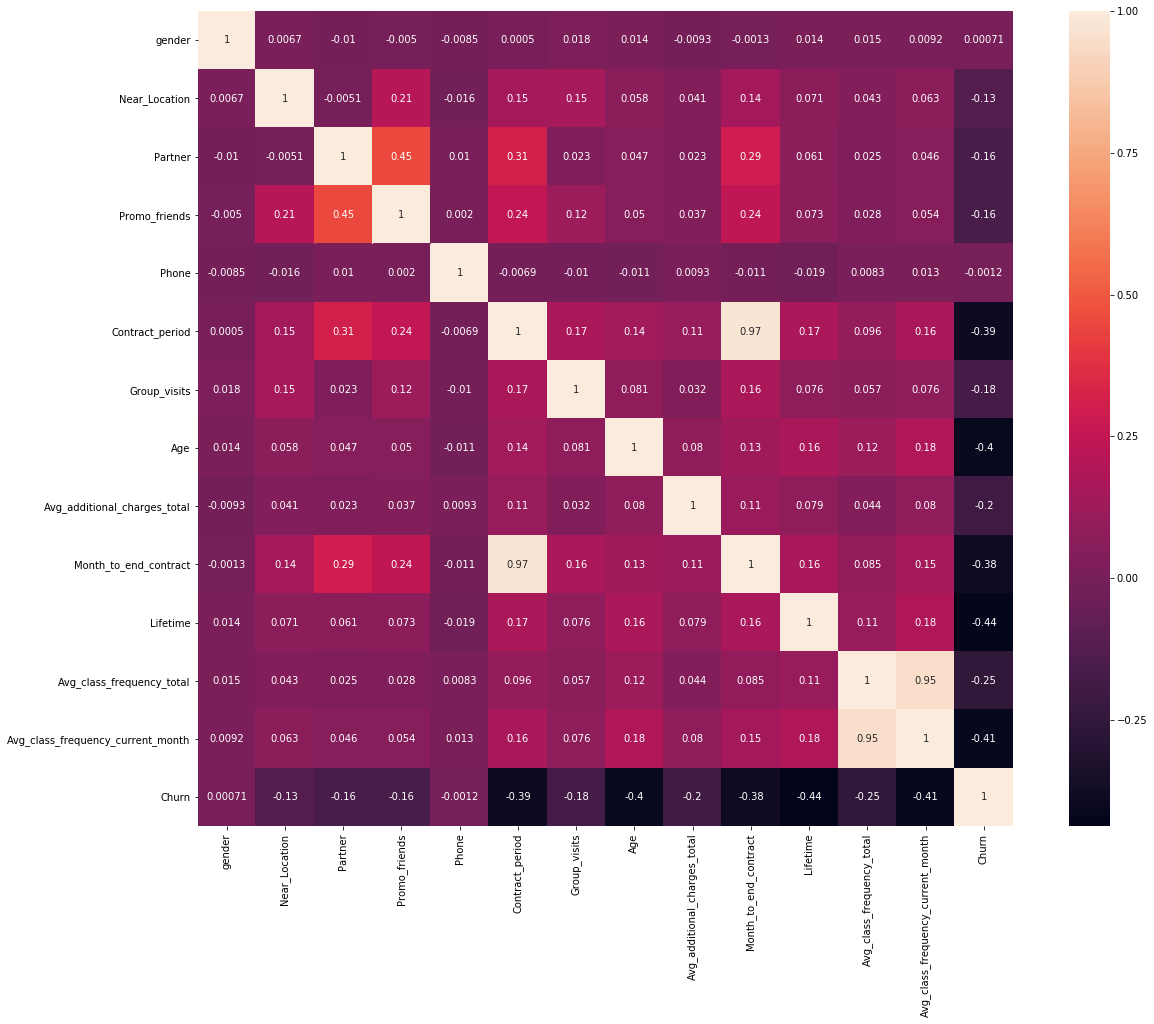

In [20]:
#fig, ax = plt.subplots()
plt.figure(figsize=(20, 15));
sns.heatmap(cm, annot=True, square=True);

У нас два сильно скоррелированных признака (коэффициент корреляции больше 0,9). Это Contract_period и Month_to_end_contract - одна и та же величниа, только с разных строн. И Avg_class_frequency_total с Avg_class_frequency_current_month. Оставим только первые, вторые удалим, потому что сильноскоррелированные признаки могут исказить картину, так как сложно определить коэффициенты значимости для взаимноисключающих признаков. Мультиколлинеарность.

In [21]:
df = df.drop(['Month_to_end_contract', 'Avg_class_frequency_current_month'], axis=1)

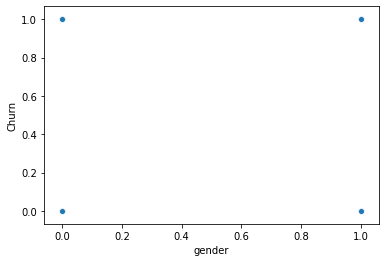

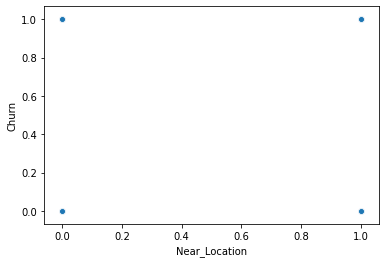

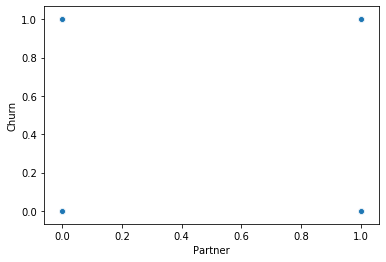

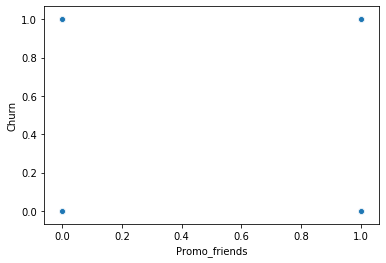

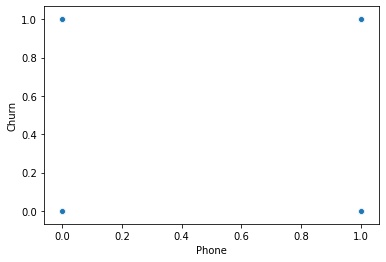

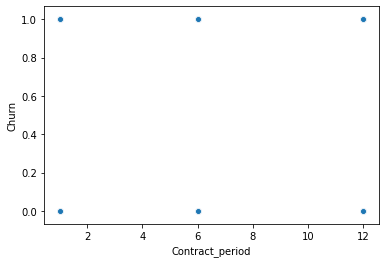

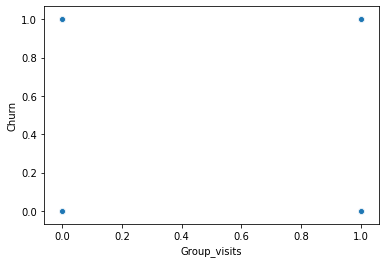

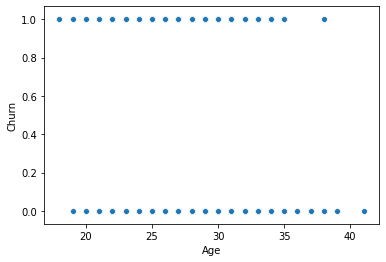

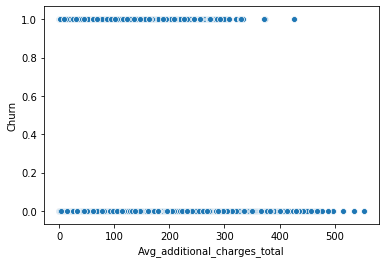

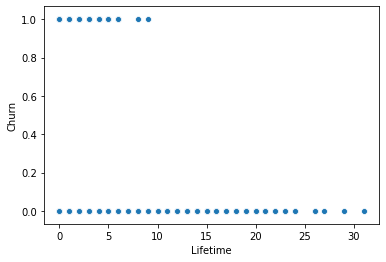

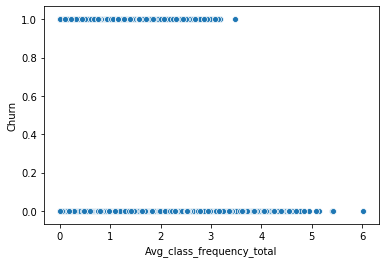

In [22]:
for column in df.drop('Churn', axis = 1).columns:
    sns.scatterplot(df[column], df['Churn'])
    plt.show()

## Модель прогнозирования оттока клиентов

Построим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце

### Разделим наши данные на признаки (матрица X) и целевую переменную (y)

In [23]:
X = df.drop('Churn', axis=1)

In [24]:
y = df['Churn']

Разделяем модель на обучающую и валидационную выборки

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

Создадим объект класса StandardScaler и применим его к обучающей выборке

In [26]:
X_train

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_total
2702,1,1,1,0,1,6,1,31,56.345649,3,0.000000
1709,1,1,0,0,1,12,1,25,161.385863,2,3.179597
907,0,1,0,1,1,6,1,30,175.561159,2,1.134427
1991,0,1,1,1,1,6,1,25,49.844578,0,2.386860
3680,0,1,0,1,0,12,1,29,148.153962,2,1.593649
...,...,...,...,...,...,...,...,...,...,...,...
1109,0,1,0,0,1,12,0,29,231.748240,1,3.132211
2313,0,1,0,0,1,12,1,30,466.027640,1,3.519716
3630,1,1,0,0,1,1,1,32,184.779344,2,2.541021
1836,0,1,0,0,1,6,0,32,101.209266,16,3.001786


In [27]:
scaler = StandardScaler()

Обучаем scaler и одновременно трансформируем матрицу для обучающей выборки

In [28]:
X_train_st = scaler.fit_transform(X_train)

In [29]:
X_train_st[:5]

array([[ 0.98265048,  0.42368158,  1.03175391, -0.65709005,  0.32751555,
         0.29763717,  1.19034383,  0.55025283, -0.92337193, -0.19265756,
        -1.92902575],
       [ 0.98265048,  0.42368158, -0.96922337, -0.65709005,  0.32751555,
         1.62230884,  1.19034383, -1.28583586,  0.16252804, -0.46105294,
         1.33328297],
       [-1.01765584,  0.42368158, -0.96922337,  1.52186142,  0.32751555,
         0.29763717,  1.19034383,  0.24423805,  0.30907146, -0.46105294,
        -0.76508827],
       [-1.01765584,  0.42368158,  1.03175391,  1.52186142,  0.32751555,
         0.29763717,  1.19034383, -1.28583586, -0.99057964, -0.99784369,
         0.51992504],
       [-1.01765584,  0.42368158, -0.96922337,  1.52186142, -3.05329013,
         1.62230884,  1.19034383, -0.06177673,  0.02573737, -0.46105294,
        -0.29392092]])

Применяем стандартизацию к матрице признаков для тестовой выборки

In [30]:
X_test_st = scaler.transform(X_test)

### Обучим модель на train-выборке двумя способами:  логистической регрессией,  случайным лесом.

In [31]:
model1 = LogisticRegression(random_state=0)

In [32]:
model1.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
X_train.columns

Index(['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone',
       'Contract_period', 'Group_visits', 'Age',
       'Avg_additional_charges_total', 'Lifetime',
       'Avg_class_frequency_total'],
      dtype='object')

In [34]:
model1.coef_[0]

array([ 0.11037985,  0.02786081,  0.03102263, -0.35295651,  0.07558805,
       -0.27692865, -0.62900056, -0.21286403, -0.00473129, -0.91163049,
       -0.58967735])

In [35]:
model1.intercept_ 

array([9.69192562])

In [36]:
y_pred1 = model1.predict(X_test)

In [37]:
model2 = RandomForestClassifier(random_state=0)

In [38]:
model2.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [39]:
model2.feature_importances_

array([0.01637119, 0.01359945, 0.01582602, 0.01391646, 0.01057721,
       0.10912275, 0.0213362 , 0.1536504 , 0.13399428, 0.35358684,
       0.15801921])

In [40]:
y_pred2 = model2.predict(X_test)

In [41]:
pd.DataFrame({'Модуль коэф-ов лин регрессии': abs(model1.coef_[0]),
             'Признаки': X_train.columns,
             'Коэф-ты лин регрессии': model1.coef_[0],
             'Коэф-ты дерева решений': model2.feature_importances_}).sort_values('Модуль коэф-ов лин регрессии', ascending=False)

,Модуль коэф-ов лин регрессии,Признаки,Коэф-ты лин регрессии,Коэф-ты дерева решений
9,0.911630,Lifetime,-0.911630,0.353587
6,0.629001,Group_visits,-0.629001,0.021336
10,0.589677,Avg_class_frequency_total,-0.589677,0.158019
3,0.352957,Promo_friends,-0.352957,0.013916
5,0.276929,Contract_period,-0.276929,0.109123
7,0.212864,Age,-0.212864,0.153650
0,0.110380,gender,0.110380,0.016371
4,0.075588,Phone,0.075588,0.010577
2,0.031023,Partner,0.031023,0.015826
1,0.027861,Near_Location,0.027861,0.013599


In [42]:
pd.DataFrame({'Модуль коэф-ов дерева решений': abs(model2.feature_importances_),
             'Признаки': X_train.columns,
             'Коэф-ты лин регрессии': model1.coef_[0],
             'Коэф-ты дерева решений': model2.feature_importances_}).sort_values('Модуль коэф-ов дерева решений', ascending=False)

,Модуль коэф-ов дерева решений,Признаки,Коэф-ты лин регрессии,Коэф-ты дерева решений
9,0.353587,Lifetime,-0.911630,0.353587
10,0.158019,Avg_class_frequency_total,-0.589677,0.158019
7,0.153650,Age,-0.212864,0.153650
8,0.133994,Avg_additional_charges_total,-0.004731,0.133994
5,0.109123,Contract_period,-0.276929,0.109123
6,0.021336,Group_visits,-0.629001,0.021336
0,0.016371,gender,0.110380,0.016371
2,0.015826,Partner,0.031023,0.015826
3,0.013916,Promo_friends,-0.352957,0.013916
1,0.013599,Near_Location,0.027861,0.013599


Две модели очень по-разному оценивают значимость признаков. Сходясь в значимости двух основных признаков - времени с момента первого обращения и средней частоты посещений. По другим же признакам мы наблюдаем расходждения. Так линейная регрессия посещению групповых занятий придает гораздо больше значения, что кажется не правильным, на основе наших первоночальных выводов. Зато факту первоначальной записи в рамках акции «приведи друга» линейная регрессия на мой взгляд логично отадет больше значения, чем дерево решений. Посмотрим на метрики.

### Оценим метрики accuracy, precision и recall для обеих моделей на валидационной выборке

In [43]:
df_metrics = pd.DataFrame({'Название метрики': ['accuracy_score', 'precision_score', 'recall_score', 'f1_score', 'roc_auc_score'], 
                           'LogisticRegression': [accuracy_score(y_test, y_pred1), 
                                                  precision_score(y_test, y_pred1), 
                                                  recall_score(y_test, y_pred1),
                                                  f1_score(y_test, y_pred1),
                                                  roc_auc_score(y_test, y_pred1)],
                           'RandomForestClassifier': [accuracy_score(y_test, y_pred2), 
                                                      precision_score(y_test, y_pred2), 
                                                      recall_score(y_test, y_pred2),
                                                      f1_score(y_test, y_pred2),
                                                      roc_auc_score(y_test, y_pred2)]})

In [44]:
df_metrics['Разница показателей метрик'] = df_metrics['LogisticRegression'] - df_metrics['RandomForestClassifier']

In [45]:
df_metrics

,Название метрики,LogisticRegression,RandomForestClassifier,Разница показателей метрик
0,accuracy_score,0.902500,0.883750,0.018750
1,precision_score,0.825243,0.814815,0.010428
2,recall_score,0.801887,0.726415,0.075472
3,f1_score,0.813397,0.768080,0.045317
4,roc_auc_score,0.870331,0.833446,0.036886


Показатели метрик наших моделей очень близки, можно сказать, что LogisticRegression чуть лучше (по recall score (полноте) и совсем незначительно accuracy score (доля правильных ответов)). По показателю точности (precision score) модель Random Forest Classifier незначительно лучше.  
По метрикам F1 и ROC-AUC LogisticRegression заметно выигрывает.

## Кластеризация клиентов  

In [46]:
X

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_total
0,1,1,1,1,0,6,1,29,14.227470,3,0.020398
1,0,1,0,0,1,12,1,31,113.202938,7,1.922936
2,0,1,1,0,1,1,0,28,129.448479,2,1.859098
3,0,1,1,1,1,12,1,33,62.669863,2,3.205633
4,1,1,1,1,1,1,0,26,198.362265,3,1.113884
...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,8,2.284497
3996,0,1,0,0,1,1,1,29,68.883764,1,1.277168
3997,1,1,1,1,1,12,0,28,78.250542,2,2.786146
3998,0,1,1,1,1,6,0,32,61.912657,3,1.630108


### Стандартизируем данные

In [47]:
sc = StandardScaler()

In [48]:
X_sc = sc.fit_transform(X)

### Матрица расстояний функцией linkage()

Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму. На основании полученного графика решим, какое количество кластеров можно выделить.

In [49]:
linked = linkage(X_sc, method = 'ward') 

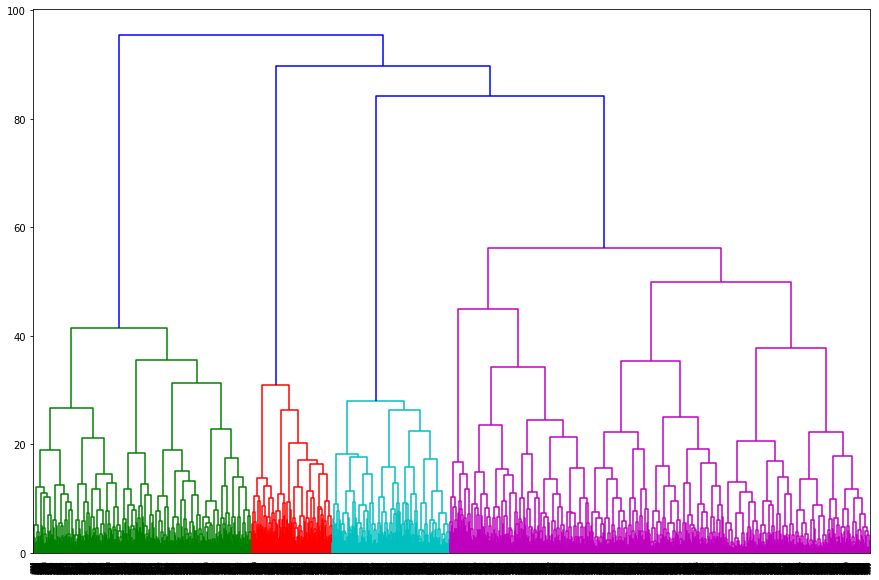

In [50]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

Предложенное оптимальное число кластеров 4 — четыре разных цветов на графике. Но в проекте предлагают взять 5

Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов (задаём модель k_means с числом кластеров 5)

In [51]:
km = KMeans(n_clusters = 5, random_state=0)

Прогнозируем кластеры для наблюдений 

In [52]:
labels = km.fit_predict(X_sc)

Сохраняем метки кластера в поле нашего датасета

In [53]:
df['cluster'] = labels

Выведем статистику по средним значениям наших признаков по кластеру

In [54]:
df.groupby('cluster').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_total,Churn
cluster,,,,,,,,,,,,
0,0.499109,0.000000,0.488414,0.076649,1.0,3.032086,0.235294,28.721925,137.540009,3.060606,1.770413,0.399287
1,0.488571,0.995238,0.955238,0.892381,1.0,7.660952,0.458095,29.543810,155.861428,4.380952,1.978963,0.120952
2,0.505300,1.000000,0.238516,0.059187,1.0,2.819788,0.000000,28.770318,143.383993,3.343640,1.800647,0.381625
3,0.544202,1.000000,0.250287,0.079219,1.0,4.528129,1.000000,29.536165,148.088897,3.761194,1.941342,0.200918
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.854211,0.266839


Рассмотрим выделенные группы подробнее.  
Сначала посмотрим, что среди них общего:
- по половому признаку разделение сохранилось примерно 50 на 50;  
- средний возраст по всем созранился в районе 28-30 лет;   

Выделим отличия каждой группы:   
- нулевая группа выделяется низким количеством приведенных по промо клиентов, низким посещением групповых занятий, затрат на доп услуги, продолжительостью с первого обращения и среднем количеством посещений. В целом эта группа имеет самые низкие показатели и логично, что имеет самый высокий процент оттока. И самое типичное в этой группе, что все клиенты не находится и не работает рядом (незначительное колчиество таких клиентов находятся и в группах 1 и 4);   
- первая группа наоборот имеет самый низкий процент оттока и для нееё характерно большая доля приведенных по промо клиентов, длительный срок контракта, высокие расходы на доп траты, больший среди остальных средний период с первого обращения и наибольшая средняя частота посещений;   
- остальный группы занимию промежуточные показатели между первыми двумя и среди уникальности можно выделить то, что наличие номера телефона в анкете нет только у четвертой группы, ни одного группового посещения у третьей группы. В остально третья и четвертая имеет чуть более лучшие показатели по признакам и как следствие меньший процент оттока, в отличие от второй.  

Построим распределение признаков для кластеров

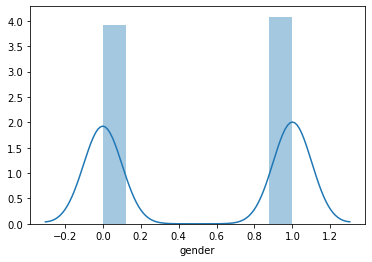

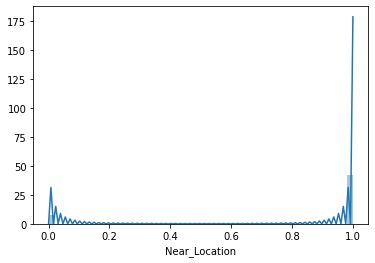

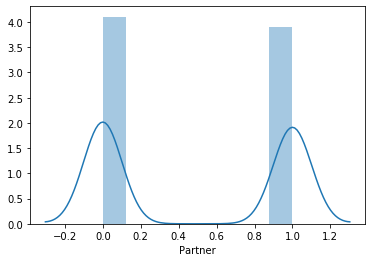

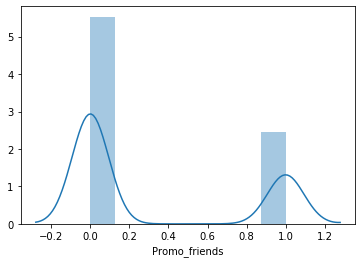

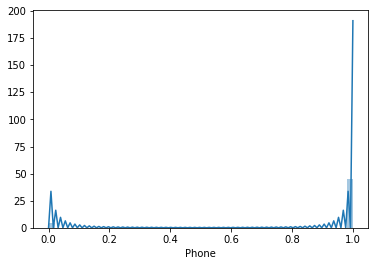

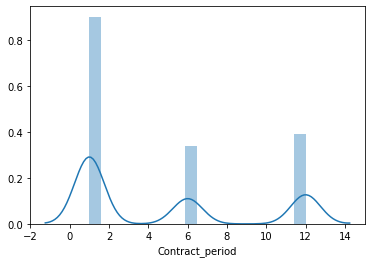

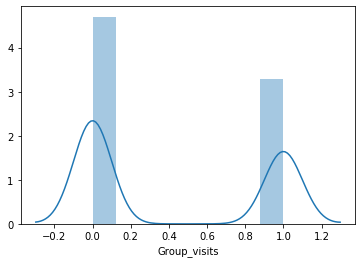

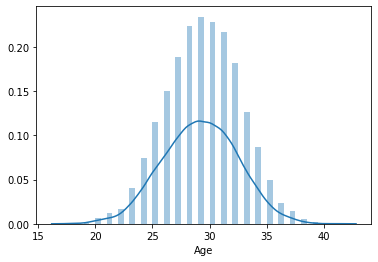

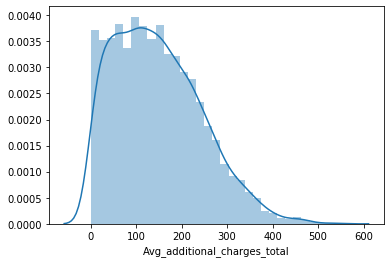

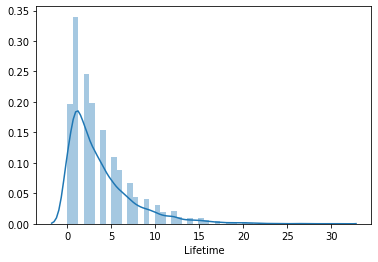

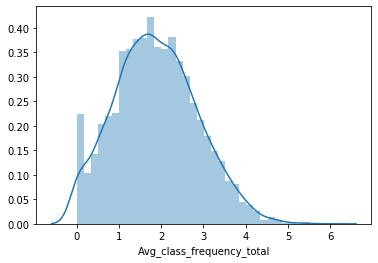

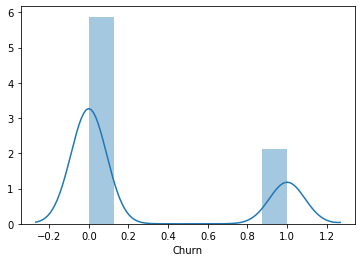

In [55]:
for feature in df[df['cluster'] == 0].drop('cluster', axis=1).columns:
    sns.distplot(df[feature])
    plt.show()

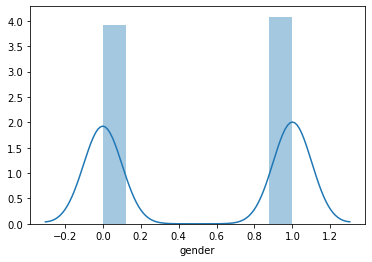

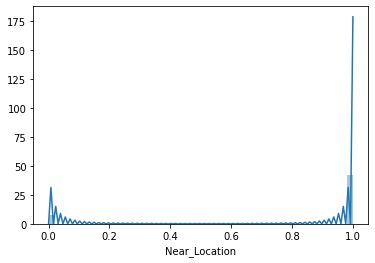

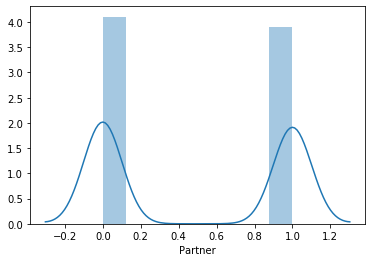

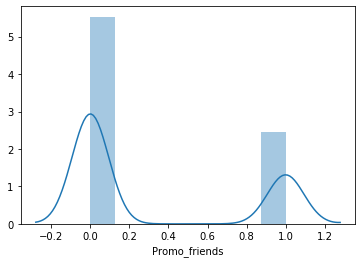

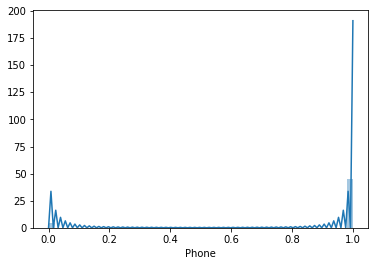

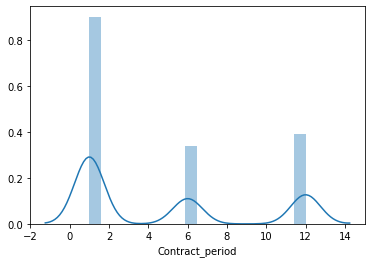

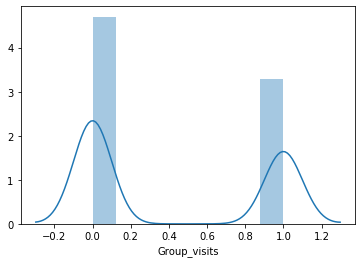

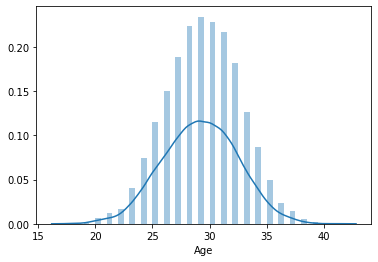

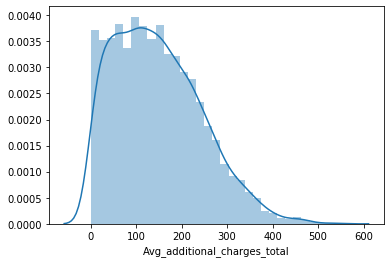

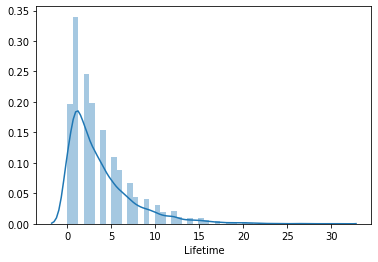

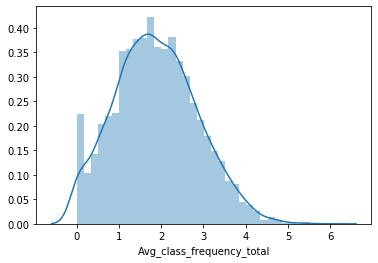

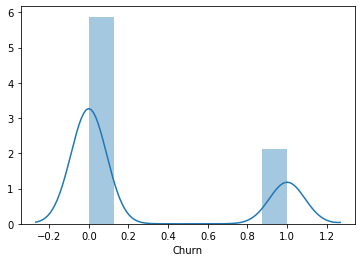

In [56]:
for feature in df[df['cluster'] == 1].drop('cluster', axis=1).columns:
    sns.distplot(df[feature])
    plt.show()

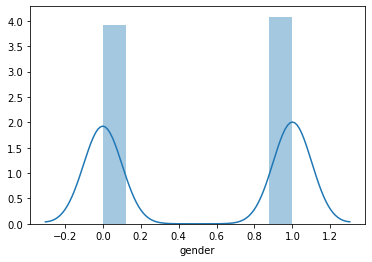

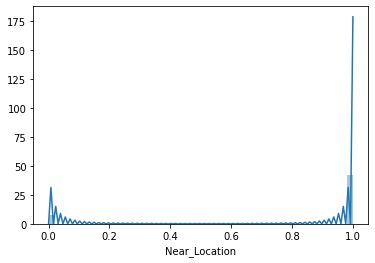

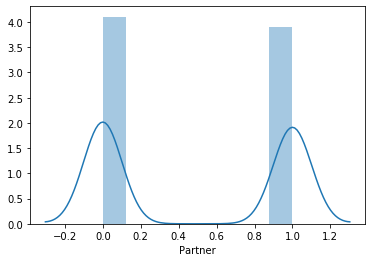

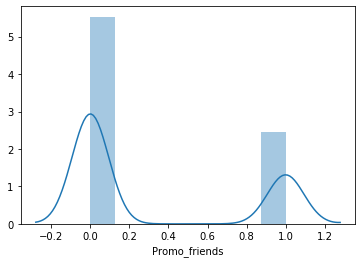

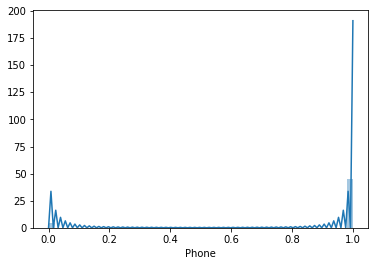

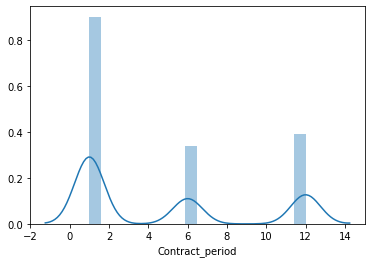

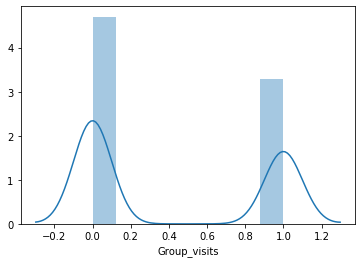

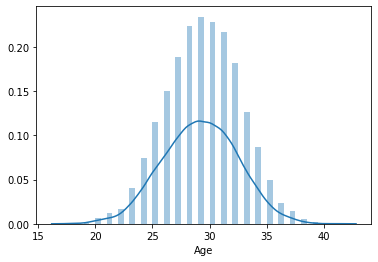

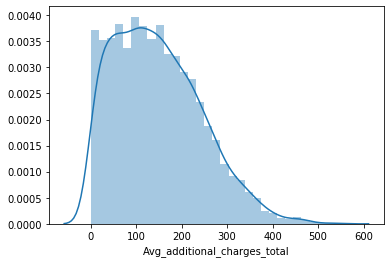

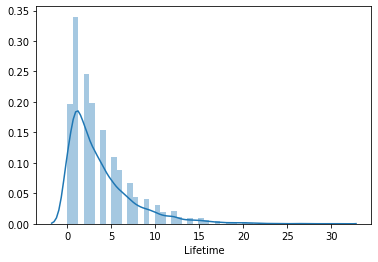

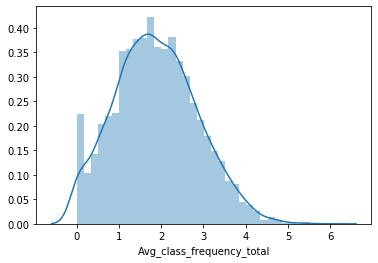

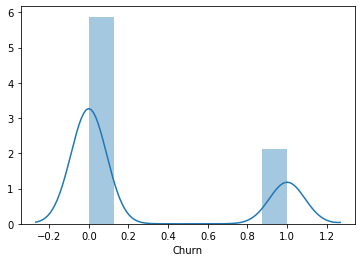

In [57]:
for feature in df[df['cluster'] == 2].drop('cluster', axis=1).columns:
    sns.distplot(df[feature])
    plt.show()

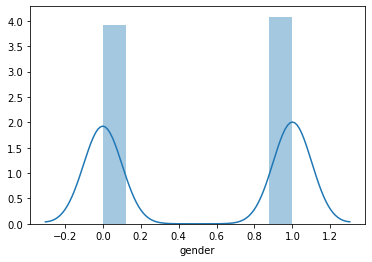

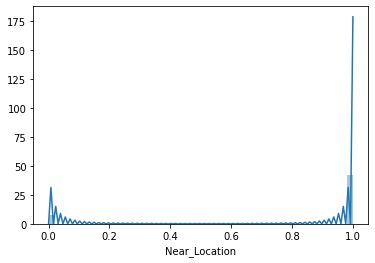

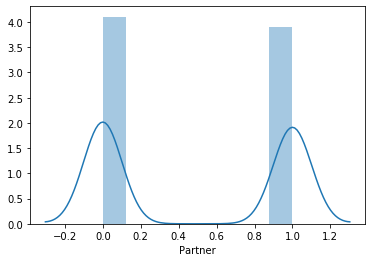

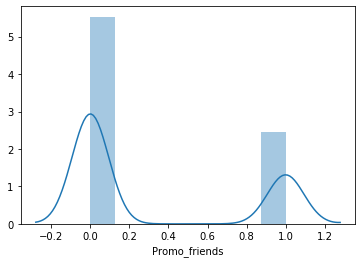

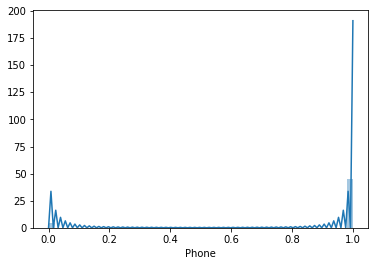

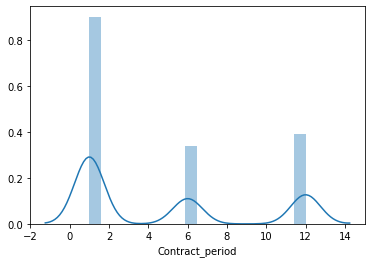

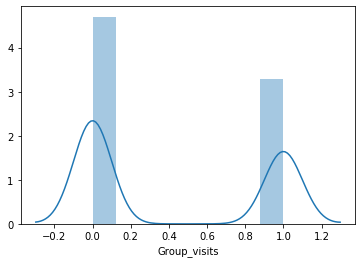

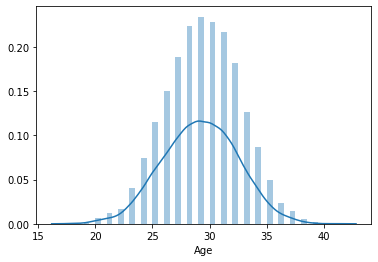

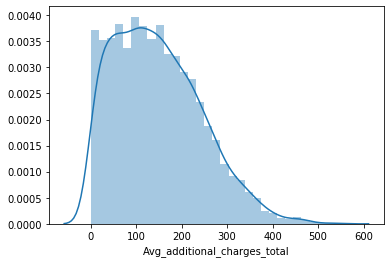

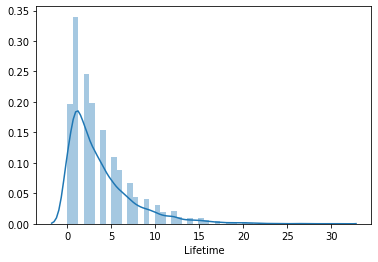

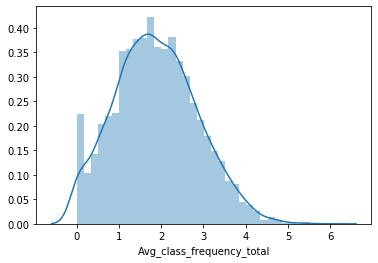

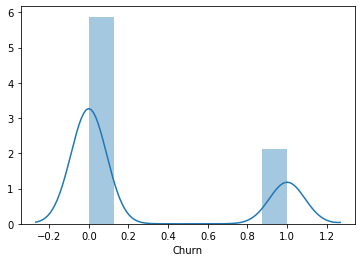

In [58]:
for feature in df[df['cluster'] == 3].drop('cluster', axis=1).columns:
    sns.distplot(df[feature])
    plt.show()

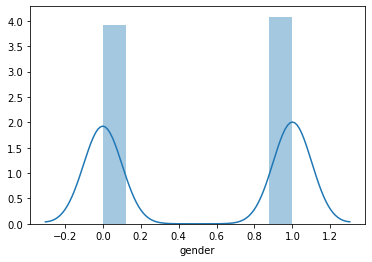

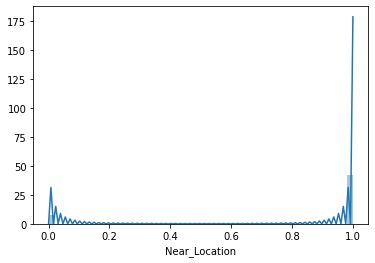

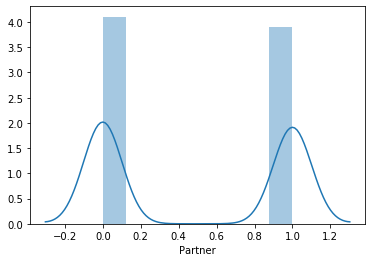

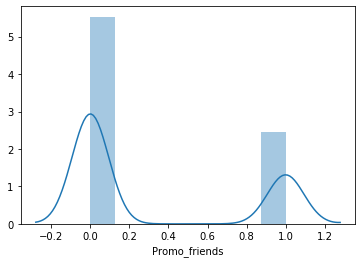

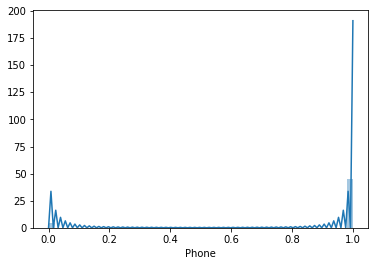

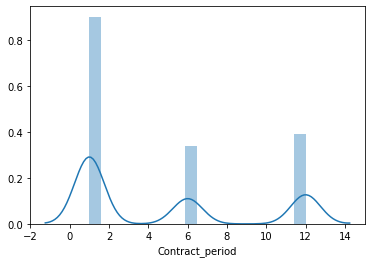

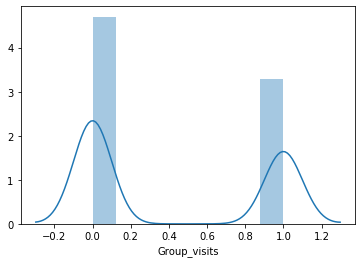

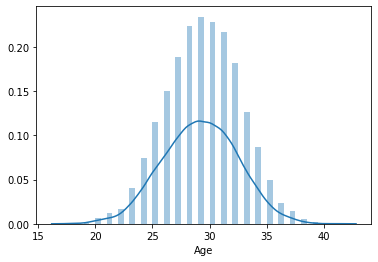

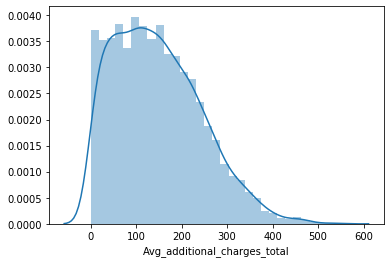

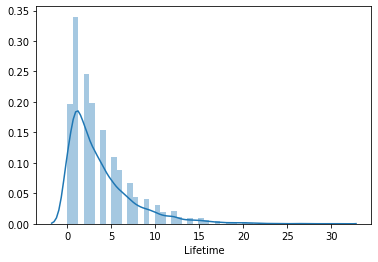

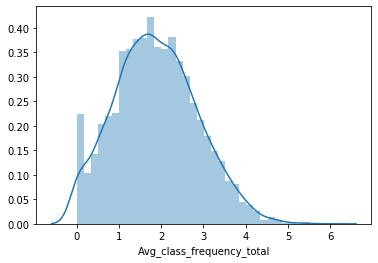

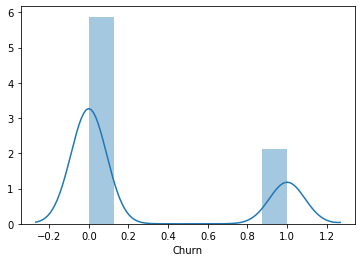

In [59]:
for feature in df[df['cluster'] == 4].drop('cluster', axis=1).columns:
    sns.distplot(df[feature])
    plt.show()

На графиках распределения наблюдается подтверждение ранее проведенного анализа.

Для каждого полученного кластера посчитаем долю оттока

In [62]:
df.groupby('cluster')['Churn'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,561.0,0.399287,0.490189,0.0,0.0,0.0,1.0,1.0
1,1050.0,0.120952,0.326227,0.0,0.0,0.0,0.0,1.0
2,1132.0,0.381625,0.486000,0.0,0.0,0.0,1.0,1.0
3,871.0,0.200918,0.400917,0.0,0.0,0.0,0.0,1.0
4,386.0,0.266839,0.442882,0.0,0.0,0.0,1.0,1.0


Как уже было сказано ранее самые выскоие проценты оттока в нулевой группе, за ней слеудет вторая. Лучше дела обстоят с третьей и четвертой группой, а самые преданные клиенты находятся в первой группе.

## Выводы и рекомендации по работе с клиентами

Мы определили, что средний возраст наших клиентов - 29 лет, большинство из них (85%) работают или живут рядом, в среднем ходят в зал пару раз в неделю, чаще приобретают абоненменты на 1 месяц и тратят на доп услуги около 147 условных единиц и на 10 девчат по статистике 10 ребят (то есть по гендерному признаку и нас примерно поровну все). Отток за месяц составил около 25%. Сказать насколько это типично, мы к сожалению не можем.  
При анализе мы выделили как значимые признаки - 
- Near_Location — проживание или работа в районе, где находится фитнес-центр; 
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);  
- Avg_class_frequency_total — средняя частота посещений в неделю за все время с начала действия абонемента;  
- Avg_additional_charges_total — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.  

Следовательно стоит делать упор на тех, кто живет и работает рядом, стимулировать продажи по акции приведи друга и стараться повышать частоту посещения и дополнительные траты у клиентов.  

Те же выводы подтвердила и кластеризация групп, в которой на указанных показателях имеет меньший отток группа один и наибольший отток нулевая группа. 